# Prophet

In [ ]:
# clone dos nossos dados 
!git clone https://github.com/joaomsimoes/TSF

In [2]:
# instalar o prophet
!pip install pystan==2.19.1.1
!pip install prophet
from prophet import Prophet
import pandas as pd

  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640067 sha256=4ab3ac6538159cd6f55ff77a7c7dee21789e2a5c81b694db4e298fc5fe8c4bfa
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


## Loading Data

In [3]:
# código para ler os nossos dados
from TSF.data_load import Data_Reader

load_data = Data_Reader()
data = load_data.get_df()
df = load_data.transform()
df = df.reset_index()

# mudar o nome das colunas conforme pedido na documentação
df = df.rename({'mes':'ds', 'precipitacao': 'y'}, axis=1)
df = df.dropna()
df.head()

,ds,y
0,2001-01-01,135.9
1,2001-02-01,68.7
2,2001-03-01,138.8
3,2001-04-01,3.6
4,2001-05-01,9.8


## Prophet Model

In [4]:
# *Retirado da documentação do Prophet* 
# For time series that exhibit strong seasonality patterns rather than trend changes, it may be useful to force the trend growth rate to be flat. 
# This can be achieved simply by passing growth=flat when creating the model

m = Prophet(growth='flat')
m.fit(df)
future = m.make_future_dataframe(periods=24, freq='MS') # MS - Month Start
forecast = m.predict(future)
forecast

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,39.493478,0.550177,126.354546,39.493478,39.493478,24.080091,24.080091,24.080091,24.080091,24.080091,24.080091,0.0,0.0,0.0,63.573570
1,2001-02-01,39.493478,0.020003,120.920696,39.493478,39.493478,22.422105,22.422105,22.422105,22.422105,22.422105,22.422105,0.0,0.0,0.0,61.915583
2,2001-03-01,39.493478,4.891006,127.623509,39.493478,39.493478,24.026781,24.026781,24.026781,24.026781,24.026781,24.026781,0.0,0.0,0.0,63.520260
3,2001-04-01,39.493478,-6.362143,119.608065,39.493478,39.493478,16.073566,16.073566,16.073566,16.073566,16.073566,16.073566,0.0,0.0,0.0,55.567044
4,2001-05-01,39.493478,-34.777197,96.336419,39.493478,39.493478,-7.899596,-7.899596,-7.899596,-7.899596,-7.899596,-7.899596,0.0,0.0,0.0,31.593882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2023-11-01,39.493478,26.447314,150.755574,39.493478,39.493478,50.509686,50.509686,50.509686,50.509686,50.509686,50.509686,0.0,0.0,0.0,90.003165
275,2023-12-01,39.493478,22.617586,146.401072,39.493478,39.493478,45.117960,45.117960,45.117960,45.117960,45.117960,45.117960,0.0,0.0,0.0,84.611438
276,2024-01-01,39.493478,-29.300480,100.089483,39.493478,39.493478,-5.091309,-5.091309,-5.091309,-5.091309,-5.091309,-5.091309,0.0,0.0,0.0,34.402169
277,2024-02-01,39.493478,-7.905812,118.068525,39.493478,39.493478,17.734302,17.734302,17.734302,17.734302,17.734302,17.734302,0.0,0.0,0.0,57.227781


### Predictions

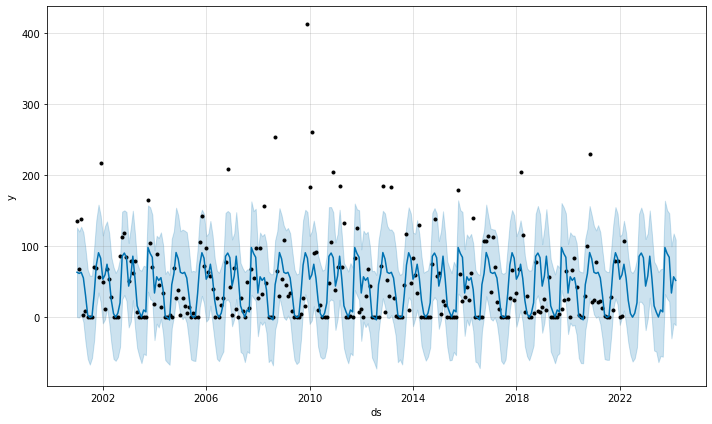

In [5]:
fig = m.plot(forecast)

(738215.0, 738946.0)

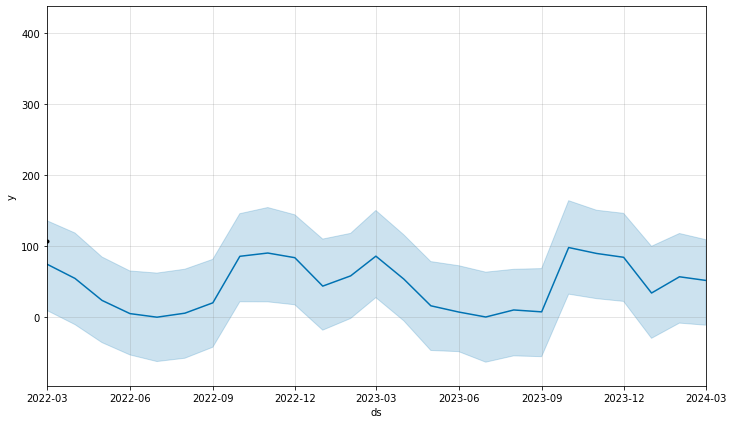

In [6]:
# Visualizar os dois anos de previsão
fig = m.plot(forecast)
ax = fig.gca()
ax.set_xlim(pd.to_datetime(['2022-03-01', '2024-03-01']))

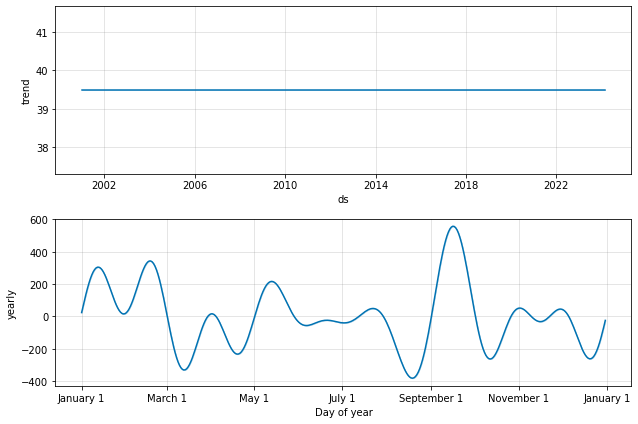

In [7]:
fig2 = m.plot_components(forecast)

## Evaluation

In [8]:
from prophet.diagnostics import cross_validation

# testar o nosso modelo com o horizonte de 2 anos
df_cv = cross_validation(m, horizon='730 days')

INFO:prophet:Making 14 forecasts with cutoffs between 2007-03-05 00:00:00 and 2020-03-01 00:00:00


  0%|          | 0/14 [00:00<?, ?it/s]

In [9]:
from prophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p.head()

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,89 days,2416.285039,49.155722,33.974370,0.878609,1.066945,0.818182
1,90 days,1701.775914,41.252587,26.949774,0.956984,1.170314,0.871212
2,91 days,1330.734402,36.479232,22.774804,1.901758,1.298511,0.901515
3,92 days,1262.716237,35.534719,21.675021,1.566773,1.306743,0.909091
4,118 days,1225.022500,35.000321,21.156827,1.901758,1.354156,0.916667


In [10]:
# obter a média do RMSE e do MAE
df_p.rmse.mean(), df_p.mae.mean()

(54.8501646127141, 37.669929034583014)

### Plot

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


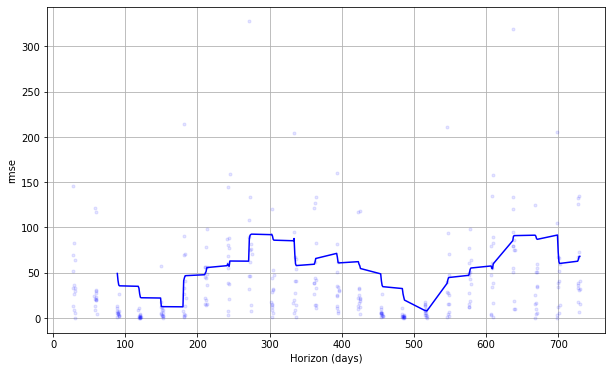

In [11]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


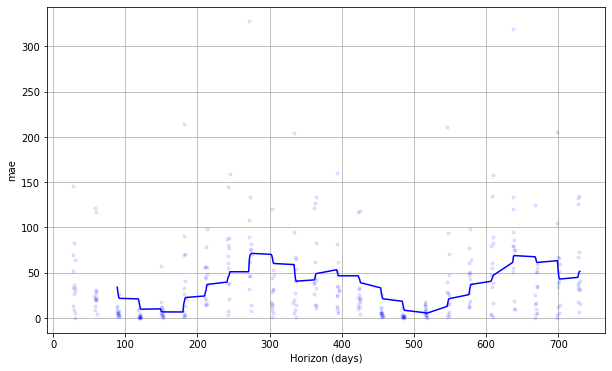

In [12]:
fig = plot_cross_validation_metric(df_cv, metric='mae')